In [5]:
import time
import random
import subprocess
import pandas as pd
from tqdm.notebook import tqdm, trange
from math import log
import numpy as np
import networkx as nx
from networkx.generators.trees import random_tree
from matplotlib import pyplot as plt
%matplotlib inline

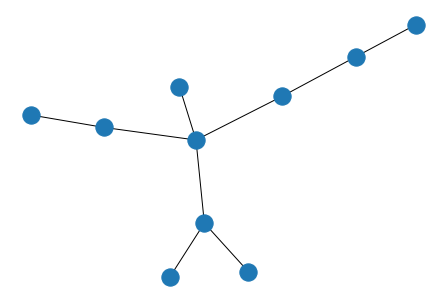

In [2]:
nx.draw(random_tree(10))

In [15]:
X, Y = [], []
for samples in trange(200):
    N = random.randint(1000, 1000000)
    Q = random.randint(1000, 1000000)
    t = random_tree(N)
    W = np.random.randint(low=0, high=100, size=N - 1)
    queries_a = np.random.randint(low=0, high=N, size=Q)
    queries_b = np.random.randint(low=0, high=N, size=Q)
    queries_w = np.random.randint(low=0, high=500, size=Q)

    with open('input.in', 'w') as f:
        # Write the network to the input file
        f.write(f'{N}\n')
        for w, (u, v) in zip(W, t.edges()):
            f.write(f'{u} {v} {w}\n')

        # Write queries to the file
        f.write(f'{Q}\n')
        for a, b, w in zip(queries_a, queries_b, queries_w):
            f.write(f'{a} {b} {w}\n')

    # Run the program
    start = time.process_time()
    subprocess.run(['./MST'])
    end = time.process_time()

    X.append( N * log(N) + Q * log(N)**2 )
    Y.append(end - start)

In [16]:
import plotly.express as px
df = pd.DataFrame({'theoretical complexity': X, 'actual time': Y})
px.scatter(df, x='theoretical complexity', y='actual time')